#Stroop Effect

###Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red;">RED</span>, <span style="color:blue;">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green;">PURPLE</span>, <span style="color:violet;">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


###Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

In [1]:
import pandas as pd
path = r'/Users/rkcosmos/Dropbox/DataAnalystNanodegree/P1/stroopdata.csv'
data = pd.read_csv(path)

#### 1. What is our independent variable? What is our dependent variable?
Independent variable: words conditions (Congruent and incongruent)

Dependent variable: the time it takes to name the ink colors in equally-sized lists.



#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1468653453869000&usg=AFQjCNF9Q1zOtQ1m5-Fk6qRzKetXPlFk7A), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1468653453870000&usg=AFQjCNH1rnUdAVBdZcs3EJxUsmQL4YdQBA) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.


First, I will check normality of the dataset using Shapiro-Wilk test.

In [2]:
from scipy import stats

W,p = stats.shapiro(data['Congruent'])
print 'p=value of Congruent data =', p

W,p = stats.shapiro(data['Incongruent'])
print 'p=value of Incongruent data =', p

p=value of Congruent data = 0.689803421497
p=value of Incongruent data = 0.00259003858082


From these p-value, I can conclude that the distribution of Incongruent data is not Gaussian with more than 99% confident (Also look at the histogram below to see the distributions). Note that the dataset is not big (n=24) so we have to use the statistical test that does not assume normality. We will use non-parametric Wilcoxon signed-rank test. The assumption for Wilcoxon signed-rank test are: 1. data are pair and come from the same population 2. data are chosen randomly and independently from the population 3. data are ordinal. This data set justify all assumptions. Note that we cannot use Mann-Whitney test and t-test because of independent and normality assumption, respectively.

The hypothesis are:

Null hypothesis H<sub>0</sub>: difference between the pairs follows a symmetric distribution around zero.

Alternative hypothesis H<sub>1</sub>: difference between the pairs does not follow a symmetric distribution around zero.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.



In [10]:
print data.describe()

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


Congruent data: mean = 14.05, Standard deviation = 3.56

Incongruent data: mean =22.02, Standard deviation  =4.80

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.



Populating the interactive namespace from numpy and matplotlib


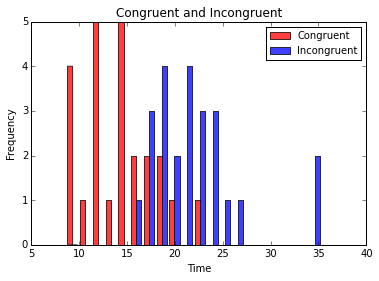

In [3]:
import matplotlib.pyplot as plt
%pylab inline

plt.hist((data['Congruent'],data['Incongruent']), 20, color=['red', 'blue'], label=['Congruent','Incongruent'], alpha=0.75)
plt.legend(prop={'size': 10})

plt.title('Congruent and Incongruent')
plt.ylabel('Frequency')
plt.xlabel('Time')

plt.show()

Distributions of Congruent and Incongruent are clealy apart from each other with small overlap.

Populating the interactive namespace from numpy and matplotlib


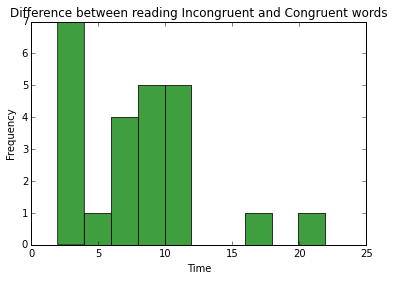

In [56]:
%pylab inline
data['difference'] = data['Incongruent'] - data['Congruent']

plt.hist(data['difference'], 10, color='green', alpha=0.75)
plt.title('Difference between reading Incongruent and Congruent words')
plt.ylabel('Frequency')
plt.xlabel('Time')

plt.show()

Plotting the difference in reading Congruent and Incongruent shows for every participant, reading Congruent is always faster.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?



In [55]:
T,p = stats.wilcoxon(data['Congruent'],data['Incongruent'])
print 'statistic value T is',T,'where T is the smaller of two sums of ranks of given sign. Smaller T implies significance.'
print 'p-value is', p

statistic value T is 0.0 where T is the smaller of two sums of ranks of given sign. Smaller T implies significance.
p-value is 1.8215297149e-05


My confidence level is 99%. The critical T value for n=24 is 61. I can confidently reject the null hypothesis meaning that stroop effect does exist in this experiment. This is expected since the data clearly show reading Congruent words is always faster than the Incongruent one.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Possible explanation for Stroop effect is the color can enhance/reduce the confident of participant when reading word resulting in faster/slower reaction. One possible alternative task is the traffic light. If we modify traffic light green(for go) and red(for stop) with <span style="color:green;">GO</span> and <span style="color:red;">STOP</span>. Then compare it with another traffic light: <span style="color:red;">GO</span> and <span style="color:green;">STOP</span>. I am sure the driver would react slower(with more error) in the later case.

# Resources

1. https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
2. https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
3. http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
4. http://www.stat.ufl.edu/~winner/tables/wilcox_signrank.pdf